This is my first attempt on a simple linear regression model to predict housing prices. Still working on improving the accuracy of the model though. This is very simple code with not much functionality. 

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 



In [16]:
#Importing DataSet 
dataset = pd.read_csv(r"D:\FSDS\april(2025)\21st- SLR\21st- SLR\SLR - House price prediction\House_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
space=dataset['sqft_living']
space

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [19]:
price=dataset['price']
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [20]:
x = np.array(space).reshape(-1, 1)
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [21]:
y = np.array(price)
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [24]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=0)

In [25]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)



LinearRegression()

In [27]:
#Predicting the prices
pred = regressor.predict(xtest)
pred

array([ 362473.73011981, 1250163.82755554,  365213.51437116, ...,
        483024.23717899,  288499.5553335 ,  255622.14431736])

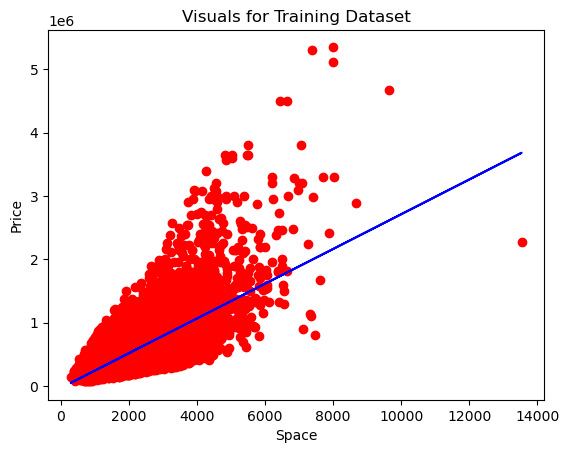

In [28]:
#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()



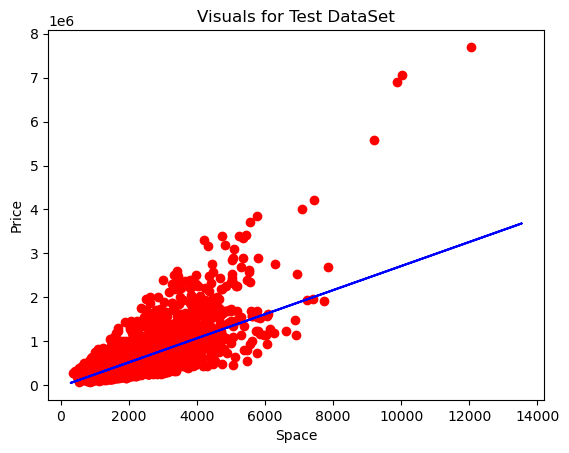

In [29]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [30]:
import os
os.getcwd()

'c:\\Users\\Admin\\A VS CODE\\House Prediction'

In [32]:
#Deployment in flask & html
#mlops(azue,googlecolab,heroku,kubernates)
import pickle
#save the trained model to disk
filename = 'linear_Regression_model.pkl'
# open a file in write-binary mode and dump the model
with open(filename,'wb') as file:
    pickle.dump(regressor,file)

print("Model has been pickled and saved as linear_regression_model.pkl")

Model has been pickled and saved as linear_regression_model.pkl


In [33]:
import os
os.getcwd()

'c:\\Users\\Admin\\A VS CODE\\House Prediction'